In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pixiedust
np.set_printoptions(suppress=True)
%matplotlib inline

Pixiedust database opened successfully


In [2]:
xs = np.linspace(-5, 7)
yt = [3*x + 5 for x in xs ]
ys = [3*x + np.random.normal(5, 2) for x in xs ]

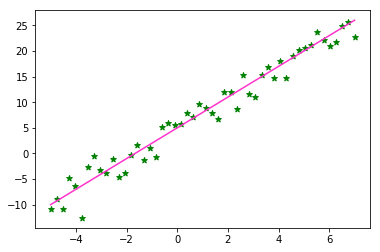

In [3]:
plt.scatter(xs, ys, color='green', marker='*');
plt.plot(xs, yt, color='#ff33cc');

In [4]:
def forward(w, x, b): # w, b - scalar; x - vector; out - vector
    return w*x + b

In [5]:
def loss(ys, y_hats): # ys, y_hats - vector; out - scalar
    return ((ys - y_hats) ** 2).mean()

In [40]:
# %%pixie_debugger
# from IPython.core.debugger import set_trace
# set_trace()

w = 0.1
b = 0.1
epochs = 201
batch_size = 25
batches = int(len(xs) / batch_size)
lr = 0.01

for e in range(epochs):
    for n in range(batches):
        batch_xs = xs[n * batch_size:n * batch_size + batch_size]
        batch_ys = ys[n * batch_size:n * batch_size + batch_size]
        
        y_hats = forward(w, batch_xs, b)
        mse = loss(batch_ys, y_hats)
        
        grad_w = ((batch_ys - y_hats) * (-batch_xs)).mean()
        grad_b = ((batch_ys - y_hats) * (-1)       ).mean()
        
        w -= (lr * grad_w)
        b -= (lr * grad_b)
        
        if e % 100 == 0:
            print("e: {} mse: {:.2f} w: {:.2f} b: {:.2f} dw: {:.2f} db: {:.2f}".format(e, mse, w, b, grad_w, grad_b))

e: 0 mse: 35.51 w: 0.22 b: 0.09 dw: -11.54 db: 0.96
e: 0 mse: 274.27 w: 0.94 b: 0.25 dw: -72.48 db: -15.72
e: 100 mse: 6.23 w: 2.99 b: 4.21 dw: 1.43 db: -0.94
e: 100 mse: 3.35 w: 3.01 b: 4.21 dw: -1.31 db: -0.32
e: 200 mse: 5.48 w: 2.95 b: 4.76 dw: -0.15 db: -0.26
e: 200 mse: 3.25 w: 2.95 b: 4.76 dw: 0.16 db: 0.07


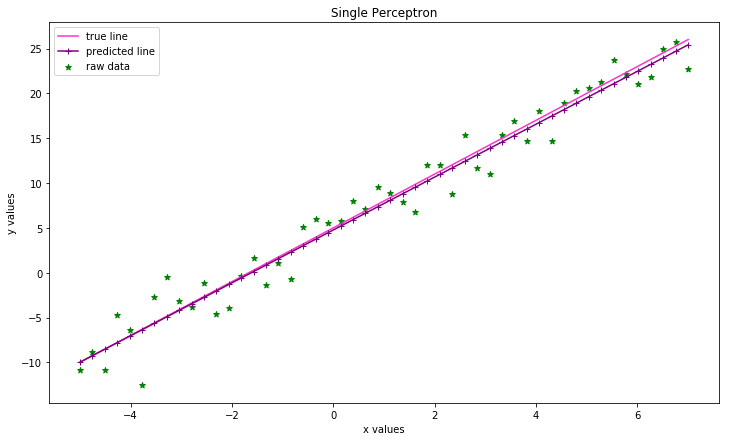

In [58]:
plt.figure(figsize=(12,7))
plt.scatter(xs, ys, color='green', marker='*', label='raw data');
plt.plot(xs, yt, color='#ff33cc', label='true line');
plt.plot(xs, w*xs + b, color='purple', marker='+', label='predicted line');
plt.title('Single Perceptron');
plt.ylabel('y values');
plt.xlabel('x values');
plt.legend();